<a href="https://colab.research.google.com/github/mkounkel/Auriga/blob/master/Lecture_13_finished.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ISM

Today we will take a look at a molecular cloud imaged in sub-mm with Herschel, and the cloud properties derived with these data

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt

We will read in already processed data extracted from the image of the Peseus molecular cloud.

In [28]:
path='http://cdsarc.u-strasbg.fr/viz-bin/nph-Cat?-plus=-%2b&J/A%2bA/587/A106/fits/planck_herschel_fit2-a.fits'
hdul = fits.open(path)
data=hdul[0].data
header=hdul[0].header
hdul.close()
header

SIMPLE  =                    T / Written by IDL:  Sat Oct 17 11:48:39 2015      
BITPIX  =                  -32 / Number of bits per data pixel                  
NAXIS   =                    3 / Number of data axes                            
NAXIS1  =                 1833 /                                                
NAXIS2  =                 2529 /                                                
NAXIS3  =                    7 /                                                
EXTEND  =                    T /Extensions may be present                       
DATE    = '2015-10-17'         / Creation UTC (CCCC-MM-DD) date of FITS header  
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', volume 376, page 359; bibcode 2001A&A...376..359H    
CTYPE1  = 'GLON-TAN'           /                                                
CTYPE2  = 'GLAT-TAN'           /                                                
CRPIX1  =        623.3234901

As the header specifies, the data cube contains a variety of different planes. The two that we are particularly interested in today is the temperature of the cloud, as well as its optical depth at 353 GHz (850 $\mu$m). Using various scaling relations ($\tau$-> E(B-V) -> AV -> n), the optical depth in turn could be transformed into column density (i.e, number of atoms per cm$^2$).

From the column density we can then estimate the volume density (i.e. cm$^{-3}$), through assuming some typical cloud width, and dividing the column density by it (using appropriate units). This is a rough approximation, because it assumes uniform density along a column, but disentangling line of sight effects can be tricky, but it is sufficiently robust for our purposes.

In [97]:
temperature=data[2]

tau850=data[0]
tau850_to_ebv=1.49e4
ebv_to_av=3.1
av_to_n=1.8e21
pc_to_cm=3.086e+18
cloud_width =5 #pc

column_density=tau850*tau850_to_ebv*ebv_to_av*av_to_n #cm-2

density= column_density/cloud_width/pc_to_cm #convert column density to volume density assuming the width of the
         #cloud of 5 pc (i.e., comparable to its width in the plane of the sky)



Use plt.imshow to display the map of the (volume) density. Use vmin and vmax as parameters to imshow, setting them to 0 and 1500 cm$^{-3}$ respectively. Make sure to include a colorbar - here, and in all subsequent images.

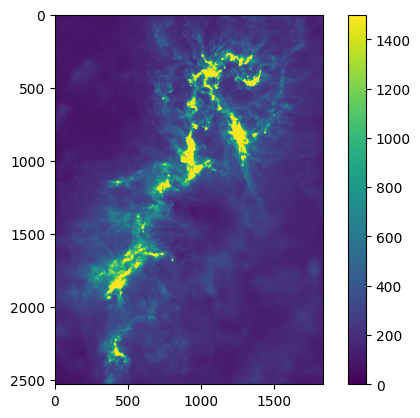

In [99]:
plt.imshow(density,vmin=0,vmax=1500)
plt.colorbar()
plt.show()

Similarly, display the map of temperature. Adjust vmin and vmax appropriately.

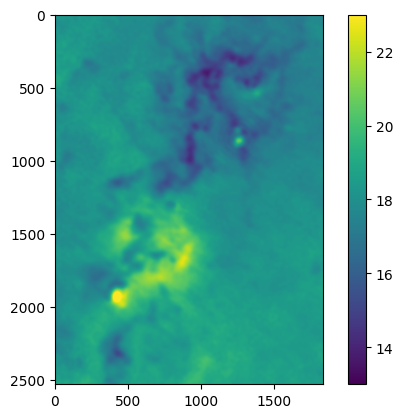

In [100]:
plt.imshow(temperature,vmin=13,vmax=23)
plt.colorbar()

Using temperature and density, calculate the Jeans mass (in Msun units) throughout the map, and display the resulting 2d image.

<ipython-input-101-8a7461ce094b>:7: RuntimeWarning: invalid value encountered in sqrt
  mjeans=(3/4/np.pi/density/m_h)**0.5*(5*k*temperature/G/m_h)**1.5/msun


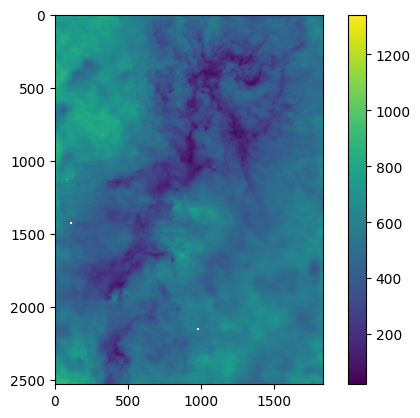

In [101]:
G    =6.67e-8 #cm3 g-1 s-2
k    =1.380e-16 #erg K-1
m_h  =1.672e-24 #g
msun=1.989e+33 #msun to g
au=1.496e+13 #cm

mjeans=(3/4/np.pi/density/m_h)**0.5*(5*k*temperature/G/m_h)**1.5/msun
x=plt.imshow(mjeans)
plt.colorbar(x)

#### Question
- What is the typical Jeans mass througout the cloud?
- What is the typical Jeans mass off the cloud?

#### Answer


---
Now let's estimate the pixel scale, i.e, whiat is the spatial distance that is represented by each individual pixel. Remember that CDELT shows the angular size of a pixel in degrees, and that angular separation in arcseconds * distance in parsecs = separation in au. We can assume the distance to Perseus of ~300 pc.

Calculate this distance in cm and store it into a varaible. Also convert it to pc and print it out to give a more physical intuition of the relevant scales.

In [102]:
pixel=header['CDELT2']*3600*300*au
print(pixel/3.08567758e18)

0.013090952847911704


Now let's calculate the mass of the cloud. To do that, we can take the column density, multiply it by the typical mass of individual particles (since we are dealing with molecular gas, and the most dominant molecule is H$_2$, you can assume it to be twice the mass of H atom), and also multiply it by the area of each pixel (in cm$^2$). Convert the result to the units of Msun.

Display the resulting map of mass/pixel$^2$.

Also sum the masses across all pixels together and print it out.

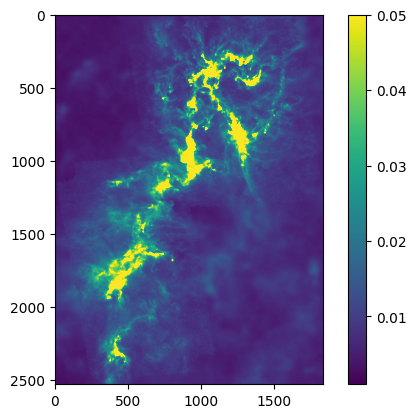

In [103]:
mass=column_density*0.33e-23*pixel**2/msun

x=plt.imshow(mass,vmin=0.001,vmax=0.05)
plt.colorbar()

####Question
What is the total mass of the cloud?

#### Answer

----
Remember that gas with the mass larger than the Jeans mass will become self-gravitating. The mass of individual pixels will be smaller than the corresponding Jeans mass of that pixel, but at the same time we expect collapse to occur across larger spatial scales.

Divide mass/pixel$^2 image by the Jeans mass. Multiply it by some number of pixels (squared) until a meaningful fraction of the cloud has this ratio >1 (you may find it helpful setting vmax to 1)

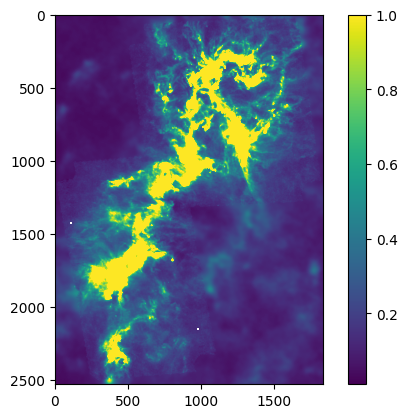

In [104]:
y=plt.imshow(mass/mjeans*100**2,vmax=1)
plt.colorbar(y)

#### Question

- What is the typical range of spatial scales (in pixels and in pc) at which the densest parts of the cloud becomes self-gravitating?
- What is the typical range of spatial scales (in pixels and in pc) at which the bulk of the cloud becomes self-gravitating?
- What is the typical range of spatial scales (in pixels and in pc) at which the gas off-cloud becomes self-gravitating?
- How do these scales compare to the typical sizes present in the cloud?
- Initially, we had to assume some width of a column of gas along the line of sight to estimate the volume density. How do you expect this assumption to influence the typical scales you derive?

#### Answer

----
#### Reflection quesions

- How long did this lab take you?
- What were the areas that were easy?
- What were the areas that presented a challenge?


#### Reflections